Iteration Comparison:

Tolerance = 0.001
Jacobi iterations: 4
Gauss-Seidel iterations: 4

Tolerance = 1e-06
Jacobi iterations: 7
Gauss-Seidel iterations: 5

Tolerance = 1e-09
Jacobi iterations: 9
Gauss-Seidel iterations: 7

Exact Solution: [ 3.  -2.5  7. ]


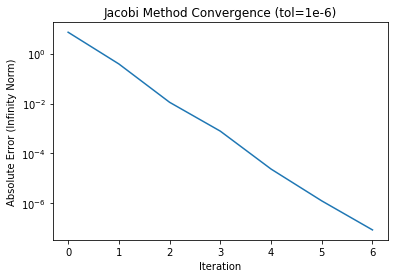

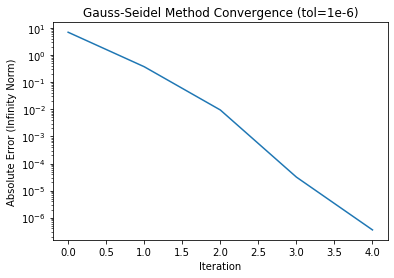

In [6]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[3.0, -0.1, -0.2],
              [0.1, 7.0, -0.3],
              [0.3, -0.2, 10.0]])

b = np.array([7.85, -19.3, 71.4])

x0 = np.zeros(3)

def jacobi(A, b, x0, tol, max_i=10000):
    x = x0.copy()
    D = np.diag(A)
    R = A - np.diagflat(D)
    errors = []

    for k in range(max_i):
        newx = (b - np.dot(R, x)) / D
        error = np.linalg.norm(newx - x, ord=np.inf)
        errors.append(error)

        if error < tol:
            return newx, k + 1, errors

        x = newx

    return x, max_i, errors


def gaussseidel(A, b, x0, tol, max_i=10000):
    x = x0.copy()
    n = len(b)
    errors = []

    for k in range(max_i):
        x_old = x.copy()

        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (b[i] - sum1 - sum2) / A[i, i]

        error = np.linalg.norm(x - x_old, ord=np.inf)
        errors.append(error)

        if error < tol:
            return x, k + 1, errors

    return x, max_i, errors


tolerances = [1e-3, 1e-6, 1e-9]

print("Iteration Comparison:\n")

for tol in tolerances:
    xj, jacobi_iters, _ = jacobi(A, b, x0, tol)
    xgs, gs_iters, _ = gaussseidel(A, b, x0, tol)

    print(f"Tolerance = {tol}")
    print(f"Jacobi iterations: {jacobi_iters}")
    print(f"Gauss-Seidel iterations: {gs_iters}")
    print()


x_exact = np.linalg.solve(A, b)
print("Exact Solution:", x_exact)


tol = 1e-6

_, _, jacobi_errors = jacobi(A, b, x0, tol)
_, _, gs_errors = gaussseidel(A, b, x0, tol)

plt.figure()
plt.semilogy(jacobi_errors)
plt.xlabel("Iteration")
plt.ylabel("Absolute Error (Infinity Norm)")
plt.title("Jacobi Method Convergence (tol=1e-6)")
plt.show()


plt.figure()
plt.semilogy(gs_errors)
plt.xlabel("Iteration")
plt.ylabel("Absolute Error (Infinity Norm)")
plt.title("Gauss-Seidel Method Convergence (tol=1e-6)")
plt.show()

As seen in the output, the Jacobi method uses more iterations than the Gauss-Seidel method.
As we make the tolerance smaller, the number of iterations needed increases for both methods, and the difference between the both methods begin to be noticable. At first, both methods used the same amount of iterations. When the tolerance became smaller however, the Jacobi started to take more iterations than the Gauss-Seidel. 
